# Dropout Regularization on the Traffic Volume Dataset

In *Activity 4.03, Model Selection Using Cross-Validation on a Traffic Volume Dataset, of Chapter 4, Evaluating Your Model with Cross-Validation Using Keras Wrappers*, you used the Traffic Volume dataset to build a model for predicting the volume of traffic across a city bridge when given various normalized features related to traffic data such as the time of day and the volume on the previous day, among others. The dataset contains 10000 records and for each of them, 10 attributes/features are included in the dataset.

In this activity, you will start with the model from *Activity 4.03, Model Selection Using Cross-Validation on a Traffic Volume Dataset, of Chapter 4, Evaluating Your Model with Cross-Validation Using Keras Wrappers*. You will use the training set/test set approach to train and evaluate the model, plot the trends in training error and the generalization error, and observe the model overfitting data examples. Then, you will attempt to improve model performance by addressing the overfitting issue through the use of dropout regularization. In particular, you will try to find out which layers you should add dropout regularization to and what rate value will improve this specific model the most. Follow these steps to complete this activity:

### 1. Load the dataset using the pandas read_csv function. The dataset is also stored in the data subfolder of the Chapter05 GitHub repository. Split the dataset into a training set and a test set with an 80-20 ratio.

In [32]:
import pandas as pd 
import numpy as np 
from tensorflow import random
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout

SEED = 1

In [33]:
X = pd.read_csv('../data/traffic_volume_feats.csv')
y = pd.read_csv('../data/traffic_volume_target.csv')

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 10) (2000, 10) (8000, 1) (2000, 1)


### 2. Define a Keras model with two hidden layers of size 10 to predict the traffic volume. Use these values for the following hyperparameters: activation='relu', loss='mean_squared_error', optimizer='rmsprop', batch_size=50, epochs=200, and shuffle=False.

### 3. Train the model on the training set and evaluate on the test set. Store the training loss and test loss at every iteration.

In [35]:
np.random.seed(SEED)
random.set_seed(SEED)

model_1 = Sequential()
model_1.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(1))

model_1.compile(optimizer='rmsprop', loss='mean_squared_error')

history_1=model_1.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=50,
    epochs=200,
    verbose=1,
    shuffle=False,
)

ch 15/200
8000/8000 [==============================] - 0s 37us/step - loss: 97.9055 - val_loss: 66.4970
Epoch 16/200
8000/8000 [==============================] - 0s 35us/step - loss: 51.4054 - val_loss: 43.1138
Epoch 17/200
8000/8000 [==============================] - 0s 32us/step - loss: 37.4436 - val_loss: 34.1615
Epoch 18/200
8000/8000 [==============================] - 0s 32us/step - loss: 31.5115 - val_loss: 30.0346
Epoch 19/200
8000/8000 [==============================] - 0s 34us/step - loss: 28.5744 - val_loss: 27.9823
Epoch 20/200
8000/8000 [==============================] - 0s 32us/step - loss: 27.0110 - val_loss: 26.9195
Epoch 21/200
8000/8000 [==============================] - 0s 32us/step - loss: 26.1857 - val_loss: 26.3331
Epoch 22/200
8000/8000 [==============================] - 0s 40us/step - loss: 25.7296 - val_loss: 26.0140
Epoch 23/200
8000/8000 [==============================] - 0s 46us/step - loss: 25.4614 - val_loss: 25.8076
Epoch 24/200
8000/8000 [================

In [36]:
history_1.history.keys()

dict_keys(['val_loss', 'loss'])

### 4. After training is completed, plot the trends in training error and test error. What are the lowest error rates on the training set and the test set?

Lowest error on training set =  24.771846520900727
Lowest error on validation set =  25.28336958885193


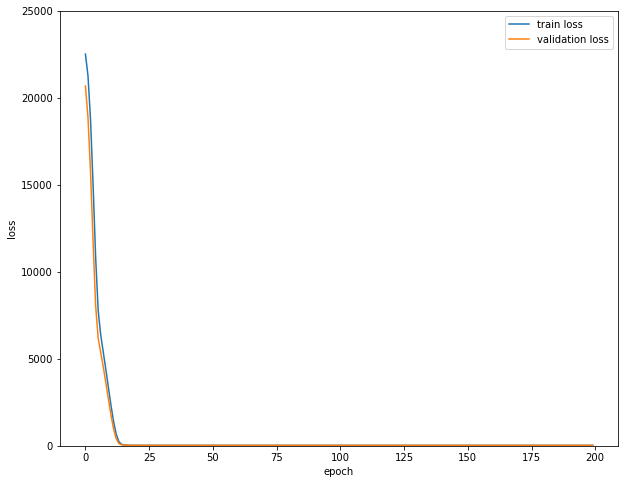

In [37]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 

plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])

plt.ylim((0, 25000))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

# print the best accuracy reached on the test set
print("Lowest error on training set = ", min(history_1.history['loss']))
print("Lowest error on validation set = ", min(history_1.history['val_loss']))

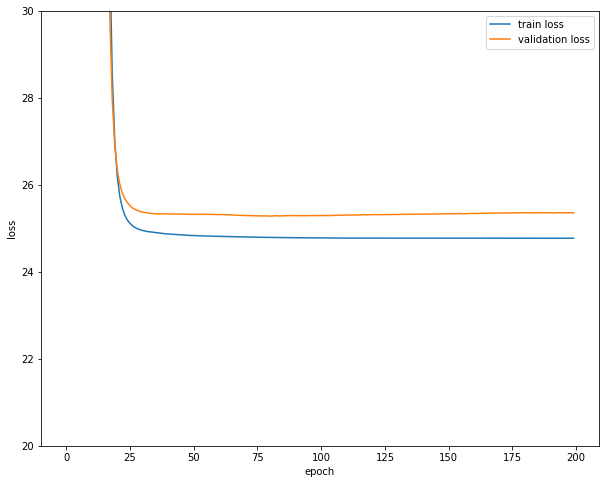

In [38]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 

plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])

plt.ylim((20, 30))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

### 5. Add dropout regularization with rate=0.1 to the first hidden layer of your model and repeat the training process (since training with dropout takes longer, train for 200 epochs). After training is completed, plot the trends in training error and test error. What are the lowest error rates on the training set and the test set?

In [39]:
np.random.seed(SEED)
random.set_seed(SEED)

model_2 = Sequential()
model_2.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
model_2.add(Dropout(rate=0.1, seed=SEED))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dense(1))

model_2.compile(optimizer='rmsprop', loss='mean_squared_error')

history_2=model_2.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=50,
    epochs=200,
    verbose=1,
    shuffle=False,
)

poch 18/200
8000/8000 [==============================] - 0s 40us/step - loss: 696.7959 - val_loss: 80.0300
Epoch 19/200
8000/8000 [==============================] - 0s 46us/step - loss: 709.1400 - val_loss: 79.1200
Epoch 20/200
8000/8000 [==============================] - 0s 48us/step - loss: 715.8178 - val_loss: 70.2702
Epoch 21/200
8000/8000 [==============================] - 0s 48us/step - loss: 633.5760 - val_loss: 73.3864
Epoch 22/200
8000/8000 [==============================] - 0s 35us/step - loss: 663.2850 - val_loss: 60.6749
Epoch 23/200
8000/8000 [==============================] - 0s 34us/step - loss: 652.4483 - val_loss: 62.2634
Epoch 24/200
8000/8000 [==============================] - 0s 40us/step - loss: 555.0044 - val_loss: 67.4911
Epoch 25/200
8000/8000 [==============================] - 0s 33us/step - loss: 622.1092 - val_loss: 58.6570
Epoch 26/200
8000/8000 [==============================] - 0s 33us/step - loss: 622.7560 - val_loss: 64.7310
Epoch 27/200
8000/8000 [=====

Lowest error on training set =  404.7619541168213
Lowest error on validation set =  57.628186798095705


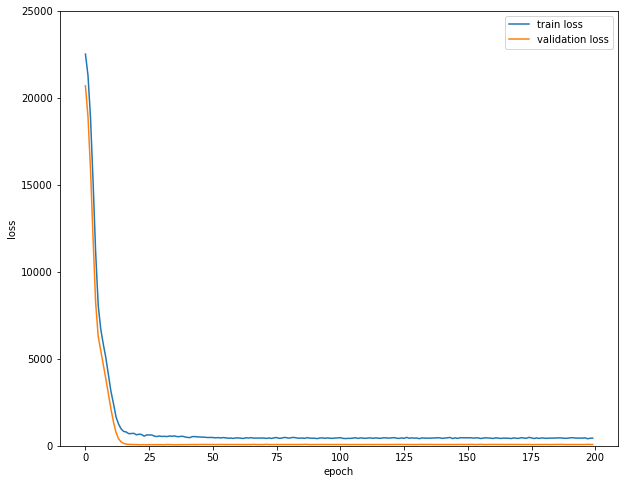

In [40]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 

plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])

plt.ylim((0, 25000))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

# print the best accuracy reached on the test set
print("Lowest error on training set = ", min(history_2.history['loss']))
print("Lowest error on validation set = ", min(history_2.history['val_loss']))

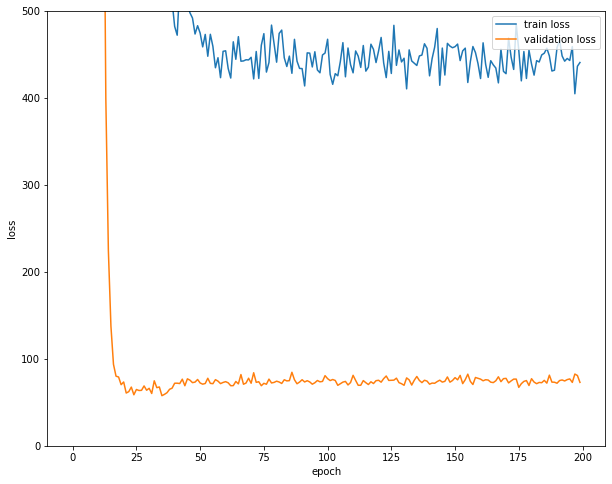

In [45]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 

plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])

plt.ylim((0, 500))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

### 6. Repeat the previous step, this time adding dropout regularization with rate=0.1 to both hidden layers of your model and train the model and report the results.

In [46]:
np.random.seed(SEED)
random.set_seed(SEED)

model_3 = Sequential()
model_3.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
model_3.add(Dropout(rate=0.1, seed=SEED))
model_3.add(Dense(10, activation='relu'))
model_3.add(Dropout(rate=0.1, seed=SEED))
model_3.add(Dense(1))

model_3.compile(optimizer='rmsprop', loss='mean_squared_error')

history_3=model_3.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=50,
    epochs=200,
    verbose=1,
    shuffle=False,
)

19/200
8000/8000 [==============================] - 0s 56us/step - loss: 1268.9123 - val_loss: 149.0397
Epoch 20/200
8000/8000 [==============================] - 0s 50us/step - loss: 1244.0481 - val_loss: 143.3597
Epoch 21/200
8000/8000 [==============================] - 0s 55us/step - loss: 1135.3831 - val_loss: 151.1297
Epoch 22/200
8000/8000 [==============================] - 0s 40us/step - loss: 1144.8240 - val_loss: 134.1606
Epoch 23/200
8000/8000 [==============================] - 0s 42us/step - loss: 1186.3699 - val_loss: 133.9872
Epoch 24/200
8000/8000 [==============================] - 0s 40us/step - loss: 1032.8115 - val_loss: 141.7626
Epoch 25/200
8000/8000 [==============================] - 0s 38us/step - loss: 1117.1767 - val_loss: 127.5284
Epoch 26/200
8000/8000 [==============================] - 0s 50us/step - loss: 1067.7183 - val_loss: 132.3577
Epoch 27/200
8000/8000 [==============================] - 1s 64us/step - loss: 1095.6845 - val_loss: 133.1352
Epoch 28/200
800

Lowest error on training set =  82.15072430372238
Lowest error on validation set =  103.25450706481934


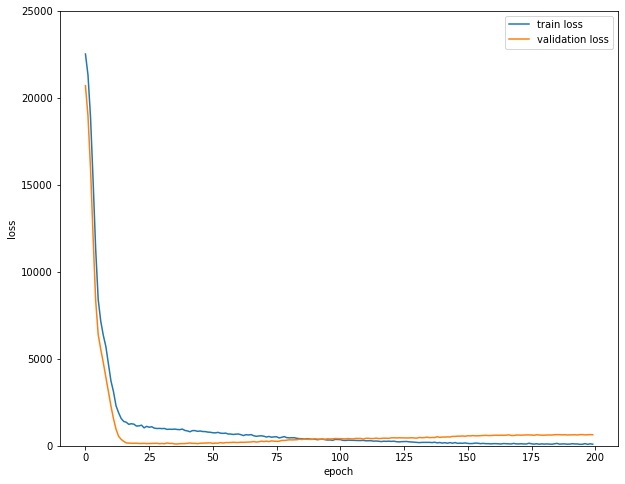

In [47]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 

plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])

plt.ylim((0, 25000))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

# print the best accuracy reached on the test set
print("Lowest error on training set = ", min(history_3.history['loss']))
print("Lowest error on validation set = ", min(history_3.history['val_loss']))

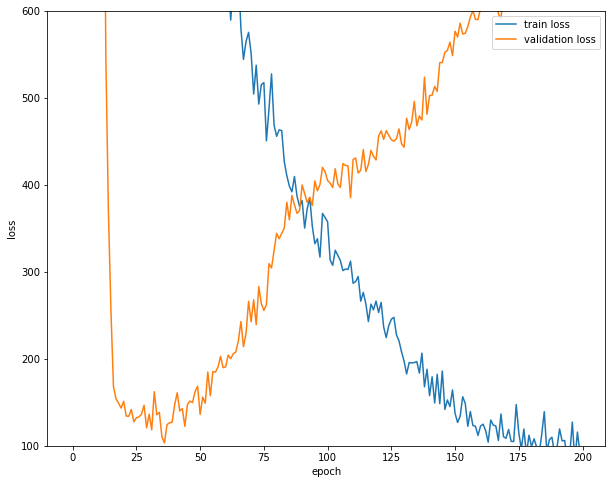

In [49]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 

plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])

plt.ylim((100, 600))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

### 7. Repeat the previous step, this time with rate=0.2 on the first layer and 0.1 on the second layer and train the model and report the results.

In [50]:
np.random.seed(SEED)
random.set_seed(SEED)

model_4 = Sequential()
model_4.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
model_4.add(Dropout(rate=0.2, seed=SEED))
model_4.add(Dense(10, activation='relu'))
model_4.add(Dropout(rate=0.1, seed=SEED))
model_4.add(Dense(1))

model_4.compile(optimizer='rmsprop', loss='mean_squared_error')

history_4=model_4.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=50,
    epochs=200,
    verbose=1,
    shuffle=False,
)

======] - 0s 50us/step - loss: 1845.6234 - val_loss: 249.2998
Epoch 21/200
8000/8000 [==============================] - 0s 40us/step - loss: 1706.4539 - val_loss: 255.2067
Epoch 22/200
8000/8000 [==============================] - 0s 46us/step - loss: 1629.5103 - val_loss: 216.2271
Epoch 23/200
8000/8000 [==============================] - 0s 50us/step - loss: 1744.8163 - val_loss: 215.0103
Epoch 24/200
8000/8000 [==============================] - 0s 57us/step - loss: 1493.2582 - val_loss: 218.8333
Epoch 25/200
8000/8000 [==============================] - 0s 49us/step - loss: 1684.9984 - val_loss: 219.5306
Epoch 26/200
8000/8000 [==============================] - 0s 46us/step - loss: 1594.2384 - val_loss: 239.1952
Epoch 27/200
8000/8000 [==============================] - 0s 36us/step - loss: 1592.9940 - val_loss: 211.3130
Epoch 28/200
8000/8000 [==============================] - 1s 64us/step - loss: 1554.5451 - val_loss: 235.8568
Epoch 29/200
8000/8000 [==============================] - 

Lowest error on training set =  162.9435268998146
Lowest error on validation set =  179.9382724761963


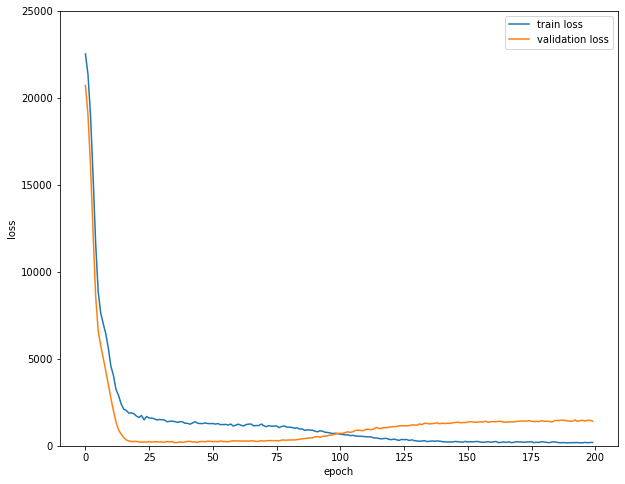

In [51]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 

plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])

plt.ylim((0, 25000))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

# print the best accuracy reached on the test set
print("Lowest error on training set = ", min(history_4.history['loss']))
print("Lowest error on validation set = ", min(history_4.history['val_loss']))

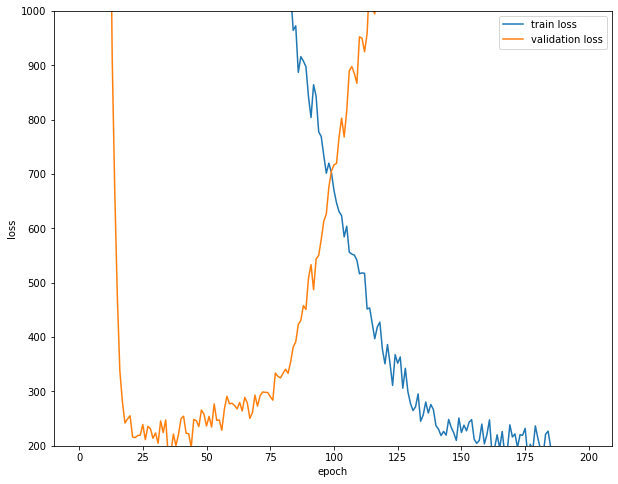

In [53]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 

plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])

plt.ylim((200, 1000))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')